##### Universidade Federal de São Carlos - UFSCar <br>Centro de Ciências Exatas e Tecnólogicas - CCET

# Trabalho de Graduação A
### Uma abordagem estatística sobre a estimação de _redshifts_ de quasares usando dados do S-PLUS
#### Visualização dos _PIT values_

Discente: Gabriela Pereira Soares<br>Orientador: Rafael Izbicki<br>Co-orientadora: Lilianne Nakazono

Abril de 2022

In [1]:
import numpy as np
import pandas as pd

from cde_diagnostics.local_test import local_test
from cde_diagnostics.global_test import global_test
from cde_diagnostics.local_pp_plot import local_pp_plot
#from cde_diagnostics.local_plot import local_plot

#import nnkcde
from cdetools.cdf_coverage import cdf_coverage
from cdetools.cde_loss import cde_loss
#from cdetools.plot_utils import plot_with_uniform_band
from scipy.stats import norm, multivariate_normal

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Carregando as coberturas calculadas no R
from numpy import genfromtxt
cov1 = genfromtxt("pit_broad_R.csv", delimiter=',')[1:]
cov2 = genfromtxt("pit_narrow_R.csv", delimiter=',')[1:]

Como a função do github já implementada no _python_ apresenta alguns problemas, vamos defini-la aqui no Jupyter.

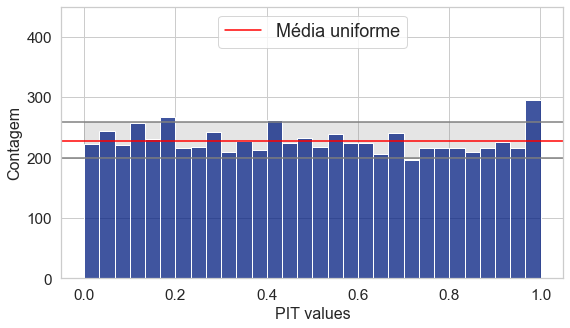

In [48]:
# Plota o histograma PIT/HPD e calcula o intervalo de confiança para os valores de bin, 
# onde os valores PIT/HPD seguem uma distribuição uniforme

# Para o caso sem as narrow bands

ci_level=0.95
n_bins=30
sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.4)

n = cov1.shape[0]
ci_quantity = (1-ci_level)/2
low_lim = binom.ppf(q=ci_quantity, n=n, p=1/n_bins)
upp_lim = binom.ppf(q=ci_level + ci_quantity, n=n, p=1/n_bins)
fig = plt.figure(figsize=(9,5))
plot = sns.histplot(cov1, bins=n_bins)
plt.axhline(y=low_lim, color='grey')
plt.axhline(y=upp_lim, color='grey')
plt.axhline(y=n/n_bins, label='Média uniforme', color="red")
plt.fill_between(x=np.linspace(0, 1, 100),
y1=np.repeat(low_lim, 100),
y2=np.repeat(upp_lim, 100),
color='grey', alpha=0.2)
plt.legend(loc='upper center', prop={'size': 18})
plt.xlabel("PIT values", size=16)
plt.ylabel("Contagem", size=16)
plt.ylim(0,450)
plt.show()

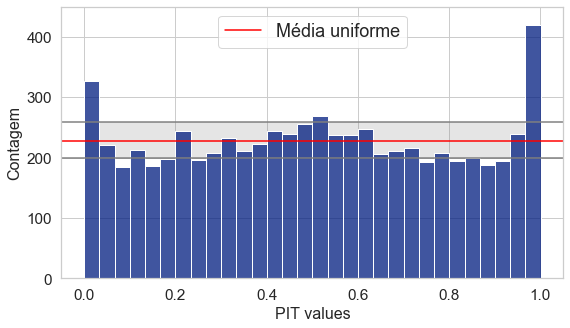

In [51]:
# Para o caso com as narrow bands

ci_level=0.95
n_bins=30
sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.4)

n = cov2.shape[0]
ci_quantity = (1-ci_level)/2
low_lim = binom.ppf(q=ci_quantity, n=n, p=1/n_bins)
upp_lim = binom.ppf(q=ci_level + ci_quantity, n=n, p=1/n_bins)
fig = plt.figure(figsize=(9,5))
plot = sns.histplot(cov2, bins=n_bins)
plt.axhline(y=low_lim, color='grey')
plt.axhline(y=upp_lim, color='grey')
plt.axhline(y=n/n_bins, label='Média uniforme', color="red")
plt.fill_between(x=np.linspace(0, 1, 100),
y1=np.repeat(low_lim, 100),
y2=np.repeat(upp_lim, 100),
color='grey', alpha=0.2)
plt.legend(loc='upper center', prop={'size': 18})
plt.xlabel("PIT values", size=16)
plt.ylabel("Contagem", size=16)
plt.ylim(0,450)
plt.show()

In [52]:
plot.get_figure().savefig("pit_narrow.png",  bbox_inches='tight') 